In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, Dropout,MaxPooling2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
(x_train,y_train), (x_test,y_test) = cifar10.load_data() 

(50000, 32, 32, 3)


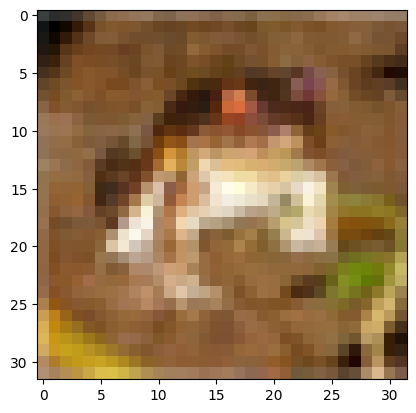

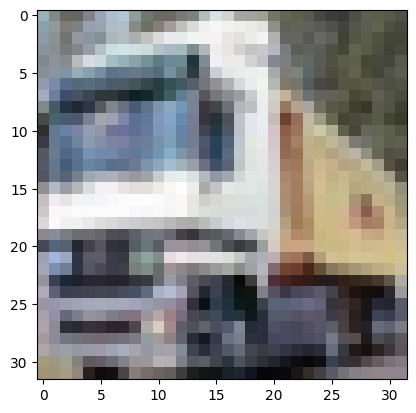

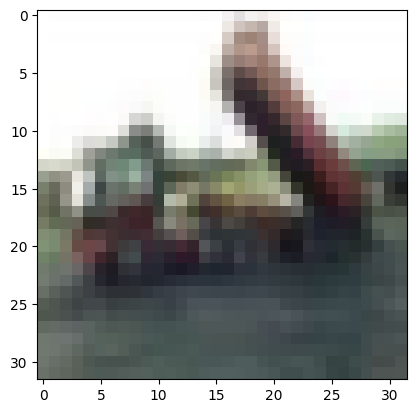

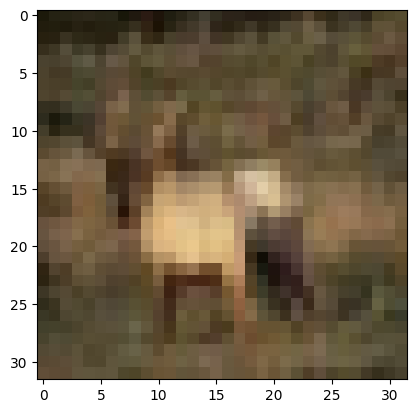

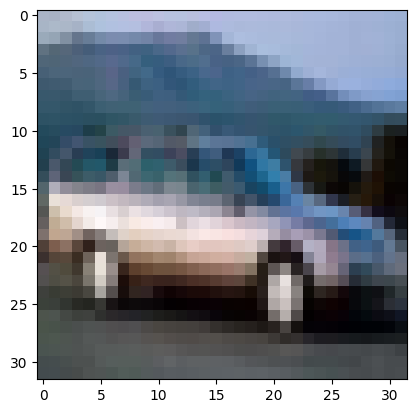

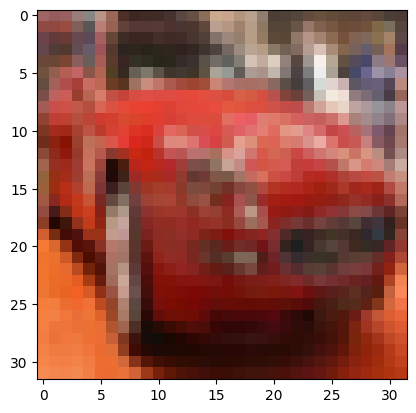

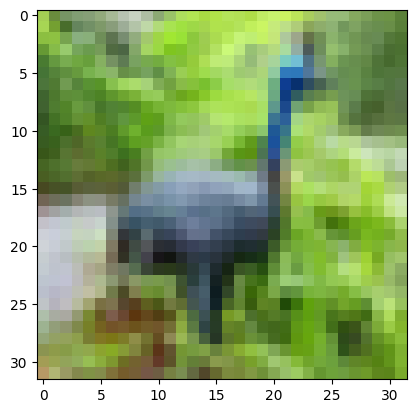

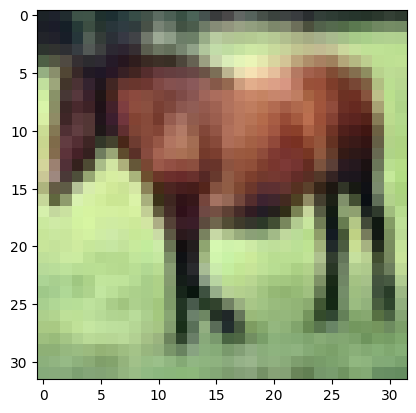

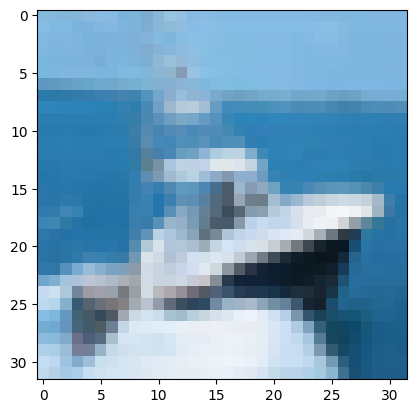

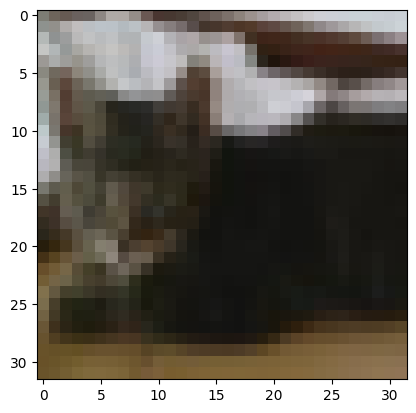

In [3]:
print(x_train.shape) ## (32,32,3) 속성
for i in range(0,10):
    plt.imshow(x_train[i], cmap='Greys')
    plt.show()

In [4]:
x_train= x_train.astype('float64')/255
x_test = x_test.astype('float64')/255

In [16]:
print(np.unique(y_train)) ## 클래스가 10개까지인 형태

[0 1 2 3 4 5 6 7 8 9]


In [5]:
model=Sequential()


model.add(Conv2D(32, kernel_size=(3,3),input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1605760   
                                                        

In [6]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelpath = './data/model/mnist_cnn.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_bset_only=True)

early_stopping_callback =EarlyStopping(monitor='val_loss', patience=10)


In [7]:
history = model.fit(x_train,y_train, validation_split=0.25, epochs=30, batch_size=200,callbacks=[early_stopping_callback, checkpointer])

Epoch 1/30
188/188 [==============================] - ETA: 0s - loss: 1.8851 - accuracy: 0.3024
Epoch 1: saving model to ./data/model\mnist_cnn.hdf5
188/188 [==============================] - 55s 287ms/step - loss: 1.8851 - accuracy: 0.3024 - val_loss: 1.5492 - val_accuracy: 0.4695
Epoch 2/30
188/188 [==============================] - ETA: 0s - loss: 1.5917 - accuracy: 0.4217
Epoch 2: saving model to ./data/model\mnist_cnn.hdf5
188/188 [==============================] - 56s 299ms/step - loss: 1.5917 - accuracy: 0.4217 - val_loss: 1.3519 - val_accuracy: 0.5365
Epoch 3/30
188/188 [==============================] - ETA: 0s - loss: 1.4654 - accuracy: 0.4685
Epoch 3: saving model to ./data/model\mnist_cnn.hdf5
188/188 [==============================] - 58s 307ms/step - loss: 1.4654 - accuracy: 0.4685 - val_loss: 1.2260 - val_accuracy: 0.5828
Epoch 4/30
188/188 [==============================] - ETA: 0s - loss: 1.3873 - accuracy: 0.4966
Epoch 4: saving model to ./data/model\mnist_cnn.hdf5
18

Epoch 30/30
188/188 [==============================] - ETA: 0s - loss: 0.7651 - accuracy: 0.7093
Epoch 30: saving model to ./data/model\mnist_cnn.hdf5
188/188 [==============================] - 55s 293ms/step - loss: 0.7651 - accuracy: 0.7093 - val_loss: 0.9214 - val_accuracy: 0.6897


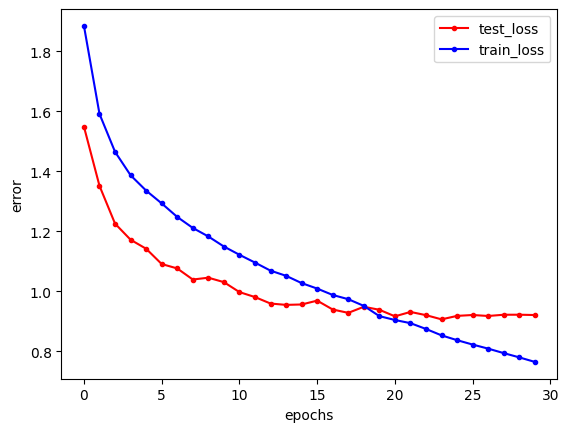

In [9]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker= '.', c='red', label='test_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label= 'train_loss')
plt.legend()

plt.xlabel('epochs')
plt.ylabel('error')
plt.show()

In [15]:
a =model.predict(x_test[1000:1001])

1/1 [==============================] - 0s 19ms/step


In [18]:
a.argmax()

5